# Interpretable Variable Encoding

<!-- Variable Encoding: Making Raw Data More Interpretable -->

## Introduction 

Variable encoding is essential for feeding learning algorithms from raw data, particularly for categorical data which often has to be numerically encoded. Ensuring this coding is useful for training the model, safe from over-fitting and interpretable, improves both the quality of the models and their relevance in an industrial context. Exploring Khiops' aptitude with raw data, we now delve deeper into its unique approach to variable encoding, ensuring that the transformed data retains its interpretability—a trait often sacrificed in the race for higher performance. 

Unlike many traditional encoding techniques that demand tricky setup and hyperparameter fine-tuning, Khiops delivers optimal encoding effortlessly thanks to its supervised approach MODL. The endoding directly aligns with the predictive objective, enhancing accuracy and relevance. Moreover, Khiops' encoding systematically refines as your data grows, reaching more granularity and precision.

In this notebook, we'll explore the Khiops' encoding capabilities, drawing contrasts with conventional methods and highlighting the interpretability and target-driven optimization. We demonstrate that its optimal encoding seamlessly slots into any machine learning pipeline (here, on a pycaret pipeline), preventing the need for making predetermined choices about encoding strategies and extensive hyperparameter optimization processes.



## Installation and set up

If you do not use our offical `khiops-notebook` Jupyter Docker image, you may have to install khiops locally using `conda`:

In [2]:
#!conda install -c khiops khiops

For the experiments, you also need some external libraries you can install via `pip`:

In [3]:
# Installation of external libraries
#!pip install matplotlib seaborn pycaret lightgbm

We now import all the dependencies here:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from random import randint
import seaborn as sns

from sklearn.model_selection import train_test_split
from khiops.sklearn.estimators import KhiopsEncoder
from khiops.sklearn import KhiopsClassifier

from pycaret.classification import *

/opt/homebrew/Caskroom/miniconda/base/envs/benchmark/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Import and Preparation of Data

For this notebook, we use the "Adult" UCI standard Dataset. More details available [here][UCI-adult].

[UCI-adult]: https://archive.ics.uci.edu/dataset/2/adult

This dataset is also available on our [khiops-sample][khiops-sample] repository on Github.

[khiops-sample]:https://github.com/KhiopsML/khiops-samples/

In [5]:
# Load data directly from our GitHub
url = "https://raw.githubusercontent.com/KhiopsML/khiops-samples/1686433ec63549a741cec49604d7004bec6e1eeb/Adult/Adult.txt"

# Read the data into a Pandas DataFrame
df = pd.read_csv(url, delimiter='\t',index_col="Label")

# Display the first 10 records from the dataset
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
Label,,,,,,,,,,,,,,,
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,less
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,less
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,less
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,less
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,less
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,less
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,less
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,more
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,more


In [6]:
# Drop the "class" column to create the feature set (X).
X = df.drop("class", axis=1)

In [7]:
# Extract the "class" column to create the target labels (y).
y = df["class"].map({'less': 0, 'more': 1})

## Overview of Khiops Encoding

 In this section, we'll explore how Khiops encodes the Adult dataset.

 In our previous notebook, we highlighted Khiops' strengths: its robustness, ability to handle raw data, and the absence of any need for parameter tuning. Due to these characteristics, cross-validation is unlikely to change the model or the variable encoding. Consequently, for this experiment, we'll adopt a straightforward train-test split.

In [8]:
# Splitting the dataset into training and test sets. 10% of the data is reserved for testing, and we set a random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# Initialize a KhiopsEncoder with specified transformation types for both categorical and numerical data.
# Here, "part_label" means that the variables will be encoded using labels derived from the Khiops discretization.
encoder = KhiopsEncoder(transform_type_categorical="part_label", transform_type_numerical="part_label")

# Fit the encoder to the training data and simultaneously transform it.
# The encoder learns the optimal encoding based on the provided features and target.
X_encoded = encoder.fit_transform(X_train, y_train)

In [10]:
# Convert the transformed (encoded) training data into a DataFrame.
# The column names for this DataFrame are fetched from the encoder's 'feature_names_out_' attribute.
X_transformed = pd.DataFrame(X_encoded, columns = encoder.feature_names_out_)

# Display the first 5 rows of the transformed training data to get a quick overview of the encoding.
X_transformed.head(5)

,LabelPage,LabelPworkclass,LabelPfnlwgt,LabelPeducation,LabelPeducation_num,LabelPmarital_status,LabelPoccupation,LabelPrelationship,LabelPrace,LabelPsex,LabelPcapital_gain,LabelPcapital_loss,LabelPhours_per_week,LabelPnative_country
0,]21.5;23.5],"{Private, Without-pay, Never-worked}",]-inf;80534],{Bachelors},]12.5;13.5],"{Never-married, Separated}","{Other-service, Priv-house-serv}",{Own-child},"{White, Asian-Pac-Islander}",{Male},]-inf;57],]-inf;70],]39.5;40.5],"{United-States, Germany, Cuba, ...}"
1,]42.5;55.5],"{Private, Without-pay, Never-worked}",]80534;201108.5],"{11th, 10th, 7th-8th, ...}",]-inf;8.5],"{Married-civ-spouse, Married-AF-spouse}","{Prof-specialty, Armed-Forces}","{Husband, Wife}","{White, Asian-Pac-Islander}",{Female},]-inf;57],]-inf;70],]43.5;49.5],"{United-States, Germany, Cuba, ...}"
2,]42.5;55.5],"{Private, Without-pay, Never-worked}",]80534;201108.5],{HS-grad},]8.5;9.5],"{Married-civ-spouse, Married-AF-spouse}",{Exec-managerial},"{Husband, Wife}","{White, Asian-Pac-Islander}",{Female},]-inf;57],]-inf;70],]-inf;34.5],"{United-States, Germany, Cuba, ...}"
3,]23.5;25.5],"{Private, Without-pay, Never-worked}",]80534;201108.5],"{Assoc-voc, Assoc-acdm}",]10.5;12.5],"{Married-civ-spouse, Married-AF-spouse}","{Craft-repair, Transport-moving}","{Husband, Wife}","{White, Asian-Pac-Islander}",{Male},]-inf;57],]-inf;70],]43.5;49.5],"{United-States, Germany, Cuba, ...}"
4,]23.5;25.5],"{Private, Without-pay, Never-worked}",]80534;201108.5],{HS-grad},]8.5;9.5],"{Married-civ-spouse, Married-AF-spouse}","{Other-service, Priv-house-serv}","{Husband, Wife}","{White, Asian-Pac-Islander}",{Male},]-inf;57],]-inf;70],]39.5;40.5],"{Mexico, Puerto-Rico, El-Salvador, ...}"


Let's compare the number of unique values between the original and encoded datasets. This will give us insights into Khiops' encoding strategy and its granularity, highlighting how it captures patterns relative to the target variable.

In [11]:
# Retrieve the number of unique values for each column
unique_vals_orig = X_train.nunique()
unique_vals_encoded = X_transformed.nunique()

# Create a comparison dataframe with the same index
comparison = pd.DataFrame(index=unique_vals_orig.index)
comparison['Original'] = unique_vals_orig
comparison['Encoded'] = unique_vals_encoded.values  # Use ".values" to ignore the index and align the values by order

# Display the result to see the reduction of distinct values for each feature
comparison


,Original,Encoded
age,74,12
workclass,8,4
fnlwgt,26655,3
education,16,7
education_num,16,7
marital_status,7,3
occupation,14,7
relationship,6,5
race,5,2
sex,2,2


We can make several remarks here:

- For many variables, Khiops has reduced the granularity. Look at age, which originally had 74 unique values but has been discretized into 12 categories. Similarly, fnlwgt had 26,655 unique values, but post-encoding, it's represented with just 3 categories.
- For variables with fewer unique values like sex, the encoding hasn't changed the cardinality.

Essentially, this encoded representation capture useful patterns in data, since it's optimized for predicting the target based independently on each variable. 

### Encoding of numerical variables

The discretization in Khiops is rooted in the [MODL approach][optimal_encoding], which partitions numerical variables into meaningful intervals. At its core, MODL seeks a balance between two competing objectives:

- Prior encourages the selection of a simple discretization model, with few intervals (the most probable model has a single interval),
- Likelihood advocates complex discretization models, i.e. composed of many intervals (the most likely model has as many intervals as there are changes in the sequence of labels).

Thus, optimizing for prior only leads to an under-fit. On the other hand, optimizing for likelyhood leads to overfitting. Both terms are derived from Bayes' formula and are mathematically consistent. So, Khiops optimizes between these two extremes, achieving a balance between underfitting and overfitting, ensuring that discretization models are relevant, robust (not too many intervals) and interpretable, capturing the underlying patterns in the data related to the target variable.

With this understanding, let's see how the variable `age` is transformed by this method.

[optimal_encoding]: ../../../learn/preprocessing/

In [12]:
# Reset indices to ensure alignment
X_reset = X_train.reset_index(drop=True)
X_transformed_reset = X_transformed.reset_index(drop=True)

# Combine original 'age' values and their transformed values into a single dataframe
combined_age_df = pd.DataFrame({
    'Original_age': X_reset['age'],
    'Encoded_age': X_transformed_reset['LabelPage']
})

# Display the first few rows to see the transformation
combined_age_df.head(10)


,Original_age,Encoded_age
0,23,]21.5;23.5]
1,46,]42.5;55.5]
2,46,]42.5;55.5]
3,24,]23.5;25.5]
4,24,]23.5;25.5]
5,43,]42.5;55.5]
6,33,]30.5;33.5]
7,24,]23.5;25.5]
8,37,]35.5;42.5]
9,53,]42.5;55.5]


From the original 74 unique values of the "age" feature, we've reduced it to 12 encoded intervals. These interval bounds are optimized by Khiops in relation to the target variable.

Now, let's first examine the distribution of the original "age" values. Following that, we'll delve into the Khiops' discretization intervals.

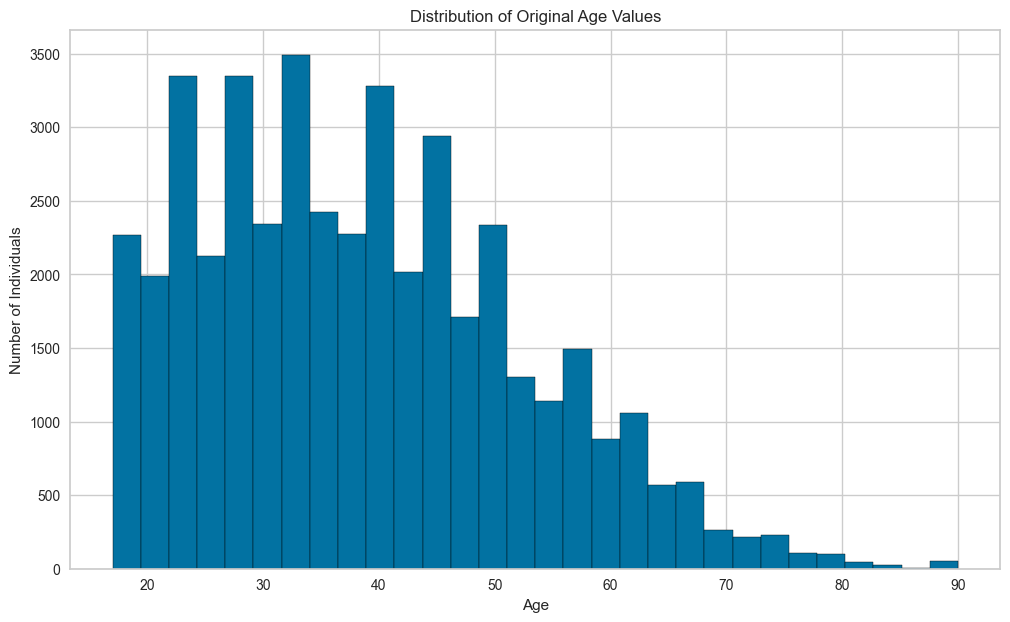

In [13]:
# Displaying the original age distribution
plt.figure(figsize=(12, 7))
X_train['age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Original Age Values')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()

The above discretization is *unsupervised*, i.e. the target is not used in its construction. This histogram approximates the distribution the variable `age` without taking the learning task into account.

Let's now take a look at the encoding provided by Khiops, which corresponds to another type of discretization, this time *supervised*. A discretization model trained by Khiops is equivalent to a univariate classifier whose aim is to estimate the class probability as a function of a single input variable (or more precisely, the interval in which the numerical value falls). The aim is therefore to identify the interval bounds that optimize probabilistic inference of the class.

Now, let's visualize  the class distribution across these intervals.

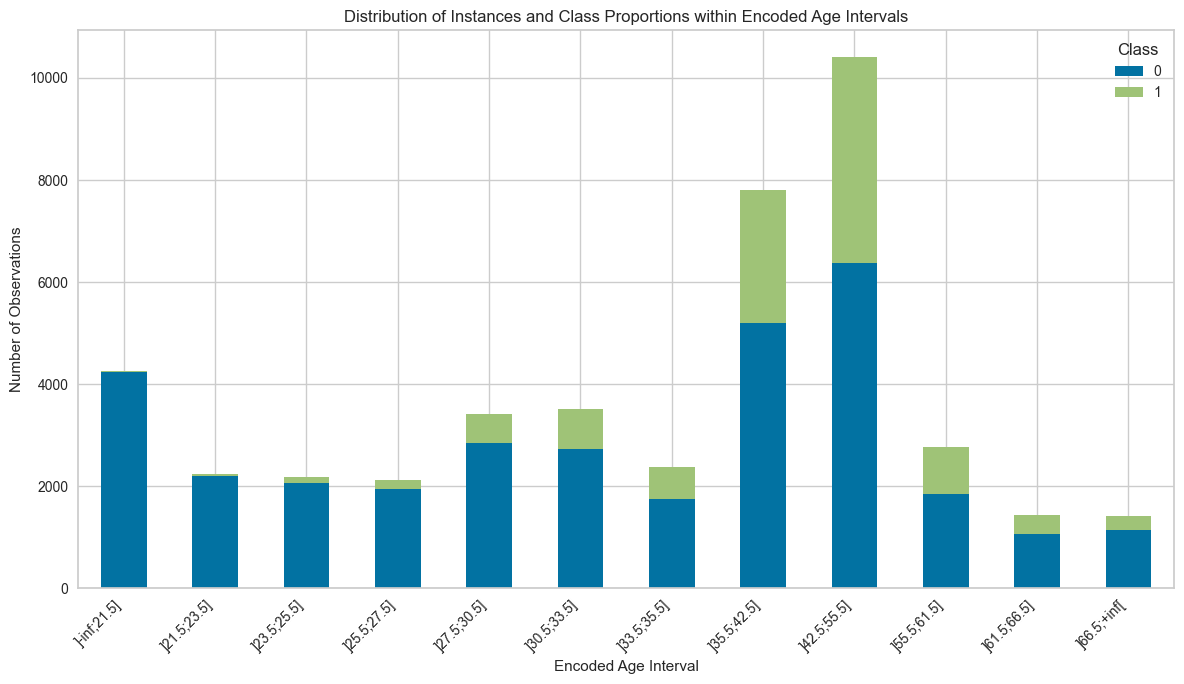

In [ ]:
# Merging the encoded ages, original ages, and target classes
combined_age_class_df = pd.DataFrame({
    'Original_age': X_train['age'].reset_index(drop=True),
    'Encoded_age': X_transformed['LabelPage'].reset_index(drop=True),
    'Class': y_train.reset_index(drop=True)
})

# Grouping by encoded age and by class, then counting the occurrences
grouped = combined_age_class_df.groupby(['Encoded_age', 'Class']).size().unstack()

# Sorting the bins
sorted_bins = combined_age_df.sort_values("Original_age").Encoded_age.drop_duplicates().tolist()
grouped = grouped.reindex(sorted_bins)

# Displaying the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Instances and Class Proportions within Encoded Age Intervals')
plt.ylabel('Number of Observations')
plt.xlabel('Encoded Age Interval')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



As shown in the figure above, the Khiops discretization doesn't try to account for the original age distribution, but focuses on the distribution of classes in each interval. Note that the intervals are constructed for this purpose, as the proportion of classes in each interval is different from that of its neighbors. 

Khiops effectively captures the most relevant nuances in the data to estimate the class distribution, which conventional discretization methods cannot do.

### Encoding of categorical variables

As with numerical variables, Khiops applies the MODL approach to transform categorical variables into modality groups, this encoding being informative for predicting the target variable. During model selection, a balance is achieved between :

- The Prior term, which encourages the selection of a simple model, with few groups of modalities (the most probable being composed of a single group);
- The Likelihood term, which favors complex models that accurately describe the training data (possibly one group per modality).

As before, optimizing the prior alone leads to over-fitting. By contrast, optimizing likelihood alone leads to over-fitting. It is the balance given by these two terms, both derived from Bayes' formula and mathematically consistent, that enables us to achieve a balance between under-fitting and over-fitting. Ultimately, the selected models accurately and robustly describe the patterns underlying the training data, with respect to target variable.  

MODL's grouping approach having been explained in detail on the [dedicated page][grouping], we now turn to the encoding of the categorical variable `workclass`.

[grouping]: ../../../learn/preprocessing/

In [34]:
# Combine original 'age' values and their transformed values into a single dataframe
combined_workclass_df = pd.DataFrame({
    'Original_workclass': X_reset['workclass'],
    'Encoded_workclass': X_transformed_reset['LabelPworkclass']
})

# Display the first few rows to see the transformation
combined_workclass_df.drop_duplicates().head(10)


,Original_workclass,Encoded_workclass
0,Private,"{Private, Without-pay, Never-worked}"
5,Self-emp-inc,{Self-emp-inc}
9,Self-emp-not-inc,"{Self-emp-not-inc, Local-gov, State-gov}"
10,State-gov,"{Self-emp-not-inc, Local-gov, State-gov}"
19,Local-gov,"{Self-emp-not-inc, Local-gov, State-gov}"
36,Federal-gov,{Federal-gov}
978,Without-pay,"{Private, Without-pay, Never-worked}"
4494,Never-worked,"{Private, Without-pay, Never-worked}"


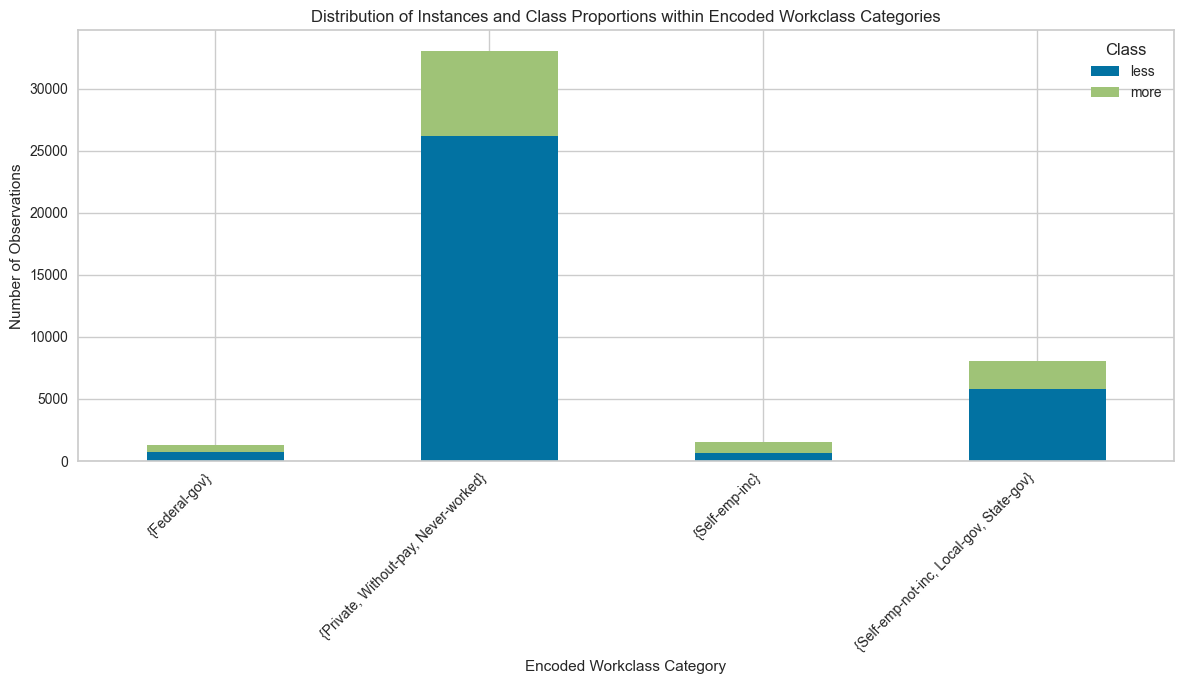

In [35]:
# Merging the encoded workclass, original workclass, and target classes
combined_workclass_class_df = pd.DataFrame({
    'Original_workclass': X_train['workclass'].reset_index(drop=True),
    'Encoded_workclass': X_transformed['LabelPworkclass'].reset_index(drop=True),
    'Class': y_train.reset_index(drop=True)
})

# Grouping by encoded workclass and by class, then counting the occurrences
grouped = combined_workclass_class_df.groupby(['Encoded_workclass', 'Class']).size().unstack()

# Sorting the categories might be unnecessary as categorical values don't have a natural ordering like numerical ones. However, if you'd like to order them by frequency or another metric, you'd do it here.

# Displaying the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribution of Instances and Class Proportions within Encoded Workclass Categories')
plt.ylabel('Number of Observations')
plt.xlabel('Encoded Workclass Category')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Just as with numerical variable encoding, Khiops groups categorical values to differentiate class probabilities within each group. This coding aims to estimate the conditional probabilities of the classes, as would a univariate classifier.

## How Khiops Encoder handles missing values and outliers

This section returns in more detail to the first notebook, which shows that training data should not be prepared with Khiops. We'll inject missing values, noise, and outliers into our dataset to understand how the Khiops Encoder manages these common challenges. The objective is to showcase the robustness and adaptability of the Khiops Encoder in the face of imperfect data. In the later section, we'll leverage this robust encoding to train an LGBM classifier, demonstrating the potential benefits of utilizing the Khiops encoding in a broader context.

In [16]:
X_train_noisy = X_train.copy()

# Percentage of missing values depending on the class
missing_rate_class_0 = 0.2  # 20% missing when class is 0
missing_rate_class_1 = 0.05  # 5% missing when class is 1

# Identify indices where class is 0
indices_class_0 = X_train_noisy.index[y.loc[X_train_noisy.index] == 0]

# Identify indices where class is 1
indices_class_1 = X_train_noisy.index[y.loc[X_train_noisy.index] == 1]

# Number of missing values for each class
N_0 = int(len(indices_class_0) * missing_rate_class_0)
N_1 = int(len(indices_class_1) * missing_rate_class_1)

# Iterate over feature columns
for col in X_train_noisy.columns:

        # the column index (for the seed)
        col_index = X_train_noisy.columns.get_loc(col)
    
        # Varying the seed by column index to distribute NaNs across different rows.
        np.random.seed(42 + col_index) ; random_indices_0 = np.random.choice(indices_class_0, N_0, replace=False)
        np.random.seed(42 + col_index) ; random_indices_1 = np.random.choice(indices_class_1, N_1, replace=False)
        
        # Introduce missing values
        X_train_noisy.loc[random_indices_0, col] = np.nan
        X_train_noisy.loc[random_indices_1, col] = np.nan

In [17]:
# Introduce noise to 'age'
np.random.seed(42)
noise_age = np.random.normal(0, 3, len(X_train_noisy))
X_train_noisy['age'] = X_train_noisy['age'] + np.round(noise_age).astype(int)

# Introduce noise to 'hours_per_week'
np.random.seed(43)
noise_hours_per_week = np.random.normal(0, 3, len(X_train_noisy))
X_train_noisy['hours_per_week'] = X_train_noisy['hours_per_week'] + np.round(noise_hours_per_week).astype(int)

# Introduce outliers to 'age'
np.random.seed(42)
outlier_indices_age = np.random.choice(X_train_noisy.index, int(0.1 * len(X_train_noisy)), replace=False)
X_train_noisy.loc[outlier_indices_age, 'age'] *= np.random.randint(20, 40, size=len(outlier_indices_age))  

# Introduce outliers to 'hours_per_week'
np.random.seed(43)
outlier_indices_hours_per_week = np.random.choice(X_train_noisy.index, int(0.1 * len(X_train_noisy)), replace=False)
X_train_noisy.loc[outlier_indices_hours_per_week, 'hours_per_week'] *= np.random.randint(20, 40, size=len(outlier_indices_hours_per_week))

# Introduce outliers to 'capital_gain'
np.random.seed(44)
outlier_indices_capital_gain = np.random.choice(X_train_noisy.index, int(0.1 * len(X_train_noisy)), replace=False)
X_train_noisy.loc[outlier_indices_capital_gain, 'capital_gain'] *= np.random.randint(20, 40, size=len(outlier_indices_capital_gain)) 

X_train_noisy.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
Label,,,,,,,,,,,,,,
21729,24.0,NaN,38238.0,Bachelors,13.0,Never-married,Other-service,NaN,White,Male,0.0,0.0,41.0,United-States
11809,46.0,NaN,116952.0,7th-8th,4.0,Married-civ-spouse,NaN,Wife,White,Female,0.0,0.0,1302.0,United-States
23968,48.0,Private,191389.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,27.0,United-States
13836,29.0,NaN,190290.0,NaN,11.0,Married-civ-spouse,NaN,NaN,White,NaN,0.0,0.0,43.0,United-States
40272,759.0,Private,200089.0,NaN,NaN,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,NaN,Guatemala
3190,42.0,Self-emp-inc,NaN,Some-college,10.0,NaN,Machine-op-inspct,Husband,White,Male,0.0,0.0,49.0,United-States
6189,38.0,Private,195488.0,NaN,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,53.0,United-States
38671,NaN,NaN,166297.0,Bachelors,NaN,Never-married,NaN,Own-child,Asian-Pac-Islander,Male,0.0,0.0,NaN,United-States
32547,NaN,Private,NaN,Assoc-acdm,12.0,NaN,NaN,NaN,White,Female,0.0,0.0,44.0,NaN


In [18]:
# Initialize a KhiopsEncoder with specified transformation types for both categorical and numerical data.
# Here, "part_label" means that the variables will be encoded using labels derived from the Khiops discretization.
encoder_noisy = KhiopsEncoder(transform_type_categorical="part_label", transform_type_numerical="part_label")

# Fit the encoder to the training data and simultaneously transform it.
# The encoder learns the optimal encoding based on the provided features and target.
X_encoded_noisy = encoder_noisy.fit_transform(X_train_noisy, y_train)

In [19]:
# Convert the transformed (encoded) training data into a DataFrame.
# The column names for this DataFrame are fetched from the encoder's 'feature_names_out_' attribute.
X_transformed_noisy = pd.DataFrame(X_encoded_noisy, columns = encoder.feature_names_out_)

# Display the first 5 rows of the transformed training data to get a quick overview of the encoding.
X_transformed_noisy.head(5)

,LabelPage,LabelPworkclass,LabelPfnlwgt,LabelPeducation,LabelPeducation_num,LabelPmarital_status,LabelPoccupation,LabelPrelationship,LabelPrace,LabelPsex,LabelPcapital_gain,LabelPcapital_loss,LabelPhours_per_week,LabelPnative_country
0,]22.5;24.5],"{, Never-worked}",]-inf;68270.5],{Bachelors},]12.5;13.5],{Never-married},"{Other-service, Priv-house-serv}","{, Unmarried}","{White, Asian-Pac-Islander}",{Male},]-inf;57],]-inf;100],]34.5;42.5],"{United-States, Philippines, Germany, ...}"
1,]42.5;56.5],"{, Never-worked}",]68270.5;187920],{},]-inf;8.5],"{Married-civ-spouse, Married-AF-spouse}","{, Handlers-cleaners}","{Husband, Wife}","{White, Asian-Pac-Islander}",{Female},]-inf;57],]-inf;100],]815;1552.5],"{United-States, Philippines, Germany, ...}"
2,]42.5;56.5],"{Private, Without-pay}",]187920;+inf[,{HS-grad},]8.5;9.5],"{Married-civ-spouse, Married-AF-spouse}",{Exec-managerial},"{Husband, Wife}","{White, Asian-Pac-Islander}",{Female},]-inf;57],]-inf;100],]-inf;29.5],"{United-States, Philippines, Germany, ...}"
3,]28.5;32.5],"{, Never-worked}",]187920;+inf[,{},]10.5;12.5],"{Married-civ-spouse, Married-AF-spouse}","{, Handlers-cleaners}","{, Unmarried}","{White, Asian-Pac-Islander}",{},]-inf;57],]-inf;100],]42.5;45.5],"{United-States, Philippines, Germany, ...}"
4,]72.5;788],"{Private, Without-pay}",]187920;+inf[,{},]-inf;8.5],"{Married-civ-spouse, Married-AF-spouse}","{Other-service, Priv-house-serv}","{Husband, Wife}","{White, Asian-Pac-Islander}",{Male},]-inf;57],]-inf;100],]-inf;29.5],"{, Mexico, Puerto-Rico, ...}"


In [41]:
# Reset indices to ensure alignment
X_reset_noisy = X_train_noisy.reset_index(drop=True)
X_transformed_noisy = X_transformed_noisy.reset_index(drop=True)

# Combine original 'age' values and their transformed values into a single dataframe
combined_df_noisy = pd.DataFrame({
    'Original_age': X_reset_noisy['age'],
    'Encoded_age': X_transformed_noisy['LabelPage'],
    'Original_workclass': X_reset_noisy['workclass'],
    'Encoded_workclass': X_transformed_noisy['LabelPworkclass']
})

# Display the first few rows to see the transformation
combined_df_noisy.head(10)

,Original_age,Encoded_age,Original_workclass,Encoded_workclass
0,24.0,]22.5;24.5],NaN,"{, Never-worked}"
1,46.0,]42.5;56.5],NaN,"{, Never-worked}"
2,48.0,]42.5;56.5],Private,"{Private, Without-pay}"
3,29.0,]28.5;32.5],NaN,"{, Never-worked}"
4,759.0,]72.5;788],Private,"{Private, Without-pay}"
5,42.0,]37.5;42.5],Self-emp-inc,{Self-emp-inc}
6,38.0,]37.5;42.5],Private,"{Private, Without-pay}"
7,NaN,Missing,NaN,"{, Never-worked}"
8,NaN,Missing,Private,"{Private, Without-pay}"
9,NaN,Missing,Self-emp-not-inc,"{Self-emp-not-inc, Local-gov, State-gov}"


Depending on the type of variable, the Khiops encoder has a different way of dealing with outliers and missing values.

For numerical variables:

- Outliers are simply considered as the largest (or smallest) values, since Khiops is based on rank statistics.
- Missing values are internally coded as an extreme rank (i.e. equivalent to minus infinity) and labelled "Missing". If these absences of value are not random and bring useful information for the target prediction, a specific interval is naturally included in the model, comprising only the "Missing" value. 

For categorical variables :

- Missing values constitute a modality in their own right, which will be included in a group with modalities that have similar class correlations. For example, in the "Work class" variable, missing values can be grouped with "Never worked" because of a common association with the target class.


## Using Khiops Encoder to improve LGBM performances


In [21]:
# the pyCaret setup for the standard models:
setup(pd.concat([X_transformed_noisy.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1), target = 'class', session_id=123, verbose=False,preprocess=False)
compare_models(include=["lightgbm",KhiopsClassifier()])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9226,0.9702,0.8077,0.8608,0.8333,0.7830,0.7838,0.4110
1,KhiopsClassifier,0.9213,0.0000,0.8017,0.8601,0.8298,0.7786,0.7795,2.9190


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
results_lgbm = pull()
results_lgbm['Model'].replace({
    'Light Gradient Boosting Machine': 'LGBM with Khiops Optimal Encoding',
    }, inplace=True)

In [23]:
# the pyCaret setup for the standard models:
setup(pd.concat([X_train_noisy, y_train], axis=1), target = 'class', session_id=123, verbose=False)
compare_models(include=["lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8950,0.9491,0.7267,0.8148,0.7681,0.7005,0.7025,0.1840


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [24]:
results_lgbm = pd.concat([results_lgbm, pull()], ignore_index=True)
results_lgbm['Model'].replace({
    'Light Gradient Boosting Machine': 'LGBM with standard Encoding',
    }, inplace=True)
results_lgbm.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,LGBM with Khiops Optimal Encoding,0.9226,0.9702,0.8077,0.8608,0.8333,0.7830,0.7838,0.411
1,KhiopsClassifier,0.9213,0.0000,0.8017,0.8601,0.8298,0.7786,0.7795,2.919
2,LGBM with standard Encoding,0.8950,0.9491,0.7267,0.8148,0.7681,0.7005,0.7025,0.184


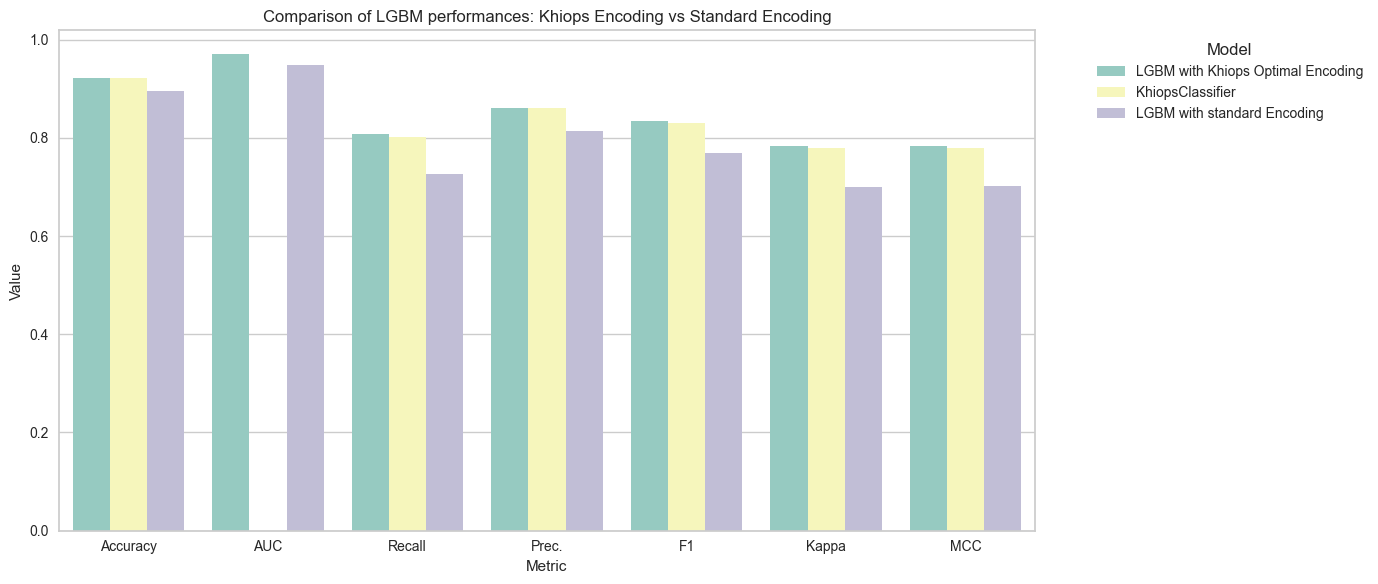

In [25]:
df_plot = results_lgbm.drop("TT (Sec)",axis=1).melt(id_vars=['Model'], var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 6))

# Create a bar plot with Seaborn
sns.barplot(x='Metric', y='Value', hue='Model', data=df_plot, palette="Set3")

plt.title("Comparison of LGBM performances: Khiops Encoding vs Standard Encoding")
plt.ylabel('Value')
plt.xlabel('Metric')

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In this section, the Khiops encoder has demonstrated its capability to significantly strengthen the performance of LGBM, especially in scenarios dealing with noisy datasets. We strongly encourage leveraging the Khiops encoder in your pipelines to benefit from its advanced encoding capabilities.

However, the true potential of this encoder is fully unlocked when coupled with the Selective Naive Bayes classifier of Khiops. Together, they ensure top-tier performance and deliver an end-to-end solution that is naturally robust, interpretable, and scalable. 

Let's delve deeper into this in the following section, where we'll explore the combined strengths of the Khiops encoder and classifier.

## Inperpratability of supervised learning with end-to-end Khiops pipeline

to be continued...